# Logistic Regression on Titanic Dataset

## Ingesting Data

In [46]:
# Import Libraries
import numpy as np
import pandas as pd

# Visualization Libs
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_csv("train.csv")

In [48]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [50]:
data['Survived'].unique() #binary classification Problem

array([0, 1], dtype=int64)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis

### Missing Values

In [53]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Try fill in missing values for Age Column ---> try mean
* Check the 2 missing values for embarked column---> try mean or mode
* drop cabin----> too many missing values

### Plots


<Axes: xlabel='Survived', ylabel='count'>

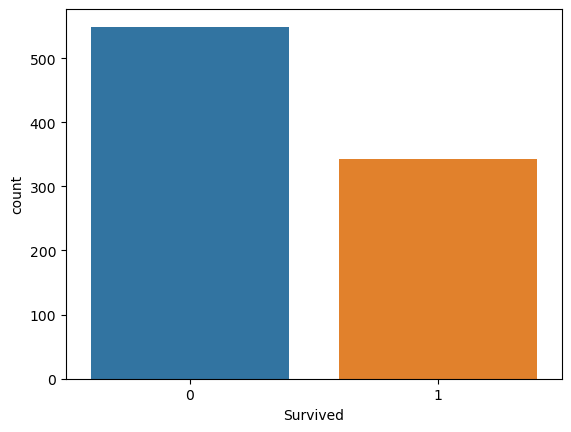

In [54]:
sns.countplot(x="Survived", data=data)

<Axes: xlabel='Survived', ylabel='count'>

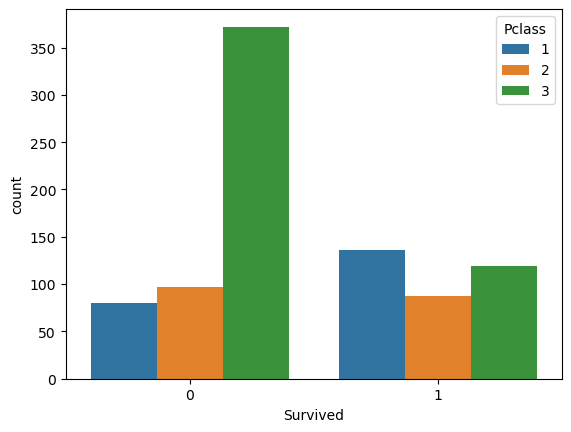

In [55]:
sns.countplot(x="Survived", hue="Pclass", data=data)

<Axes: xlabel='Survived', ylabel='count'>

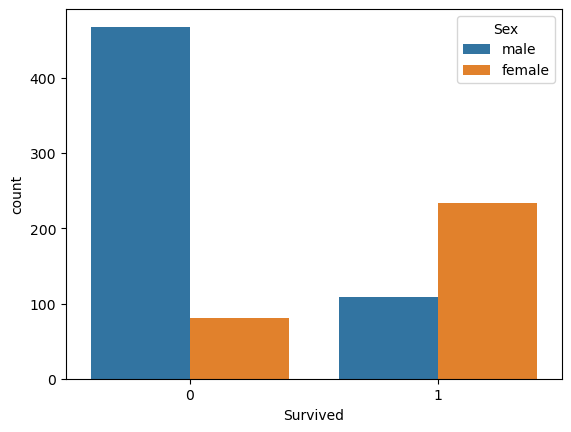

In [56]:
sns.countplot(x="Survived", hue="Sex", data=data)

<Axes: xlabel='Survived', ylabel='count'>

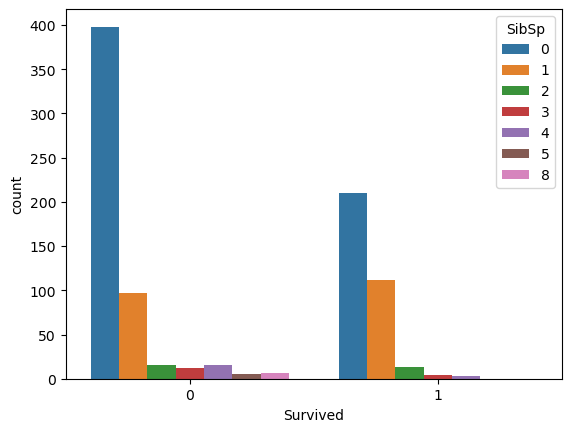

In [57]:
sns.countplot(x="Survived", hue="SibSp", data=data)

* Questions
* why more women survived?
* Why Passenger Class 1 survived more
* Breakdown of Male and female in each passenger class 

### Groupby with Pandas

. Why pclass1 survived


In [58]:
!pip install --upgrade pandas


In [59]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
data.groupby('Pclass')

In [61]:
data.drop("Name",axis=1,inplace= True) 

In [62]:
# aggregate funtion --> sum
data.groupby('Pclass').mean()["Fare"]

TypeError: Could not convert femalefemalemalefemalemalemalemalefemalemalemalefemalemalemalefemalemalemalemalefemalemalemalemalemalemalemalemalefemalemalemalefemalemalefemalemalemalemalefemalemalemalefemalefemalemalefemalefemalemalefemalemalemalemalefemalefemalefemalemalemalefemalefemalemalemalefemalemalefemalefemalemalefemalemalefemalemalefemalefemalefemalefemalefemalefemalefemalefemalefemalemalemalefemalemalefemalemalefemalemalefemalefemalefemalemalemalefemalemalefemalefemalemalefemalefemalemalemalefemalemalemalemalemalemalemalemalefemalemalemalemalemalemalefemalemalemalemalefemalefemalefemalemalemalemalefemalemalefemalefemalemalemalefemalefemalefemalemalemalemalemalefemalemalefemalefemalemalefemalefemalemalefemalemalefemalemalemalemalemalefemalemalemalefemalemalemalemalefemalemalemalemalemalemalefemalemalemalemalefemalemalemalemalefemalemalemalefemalefemalemalemalefemalemalefemalemalemalemalefemalemalemalefemalefemalefemalemalefemalefemalemalemalemalefemalemalemalefemalemalefemalemalefemalefemalemalefemalefemalefemalefemalemalefemalemalefemalemalefemalefemalemale to numeric

## Model Training

## Split Data